In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

!ls german-traffic-sign

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2
 
 
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline
np.random.seed(0)
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
 
    
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
 
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
ls: cannot access 'german-traffic-sign': No such file or directory


Using TensorFlow backend.


(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


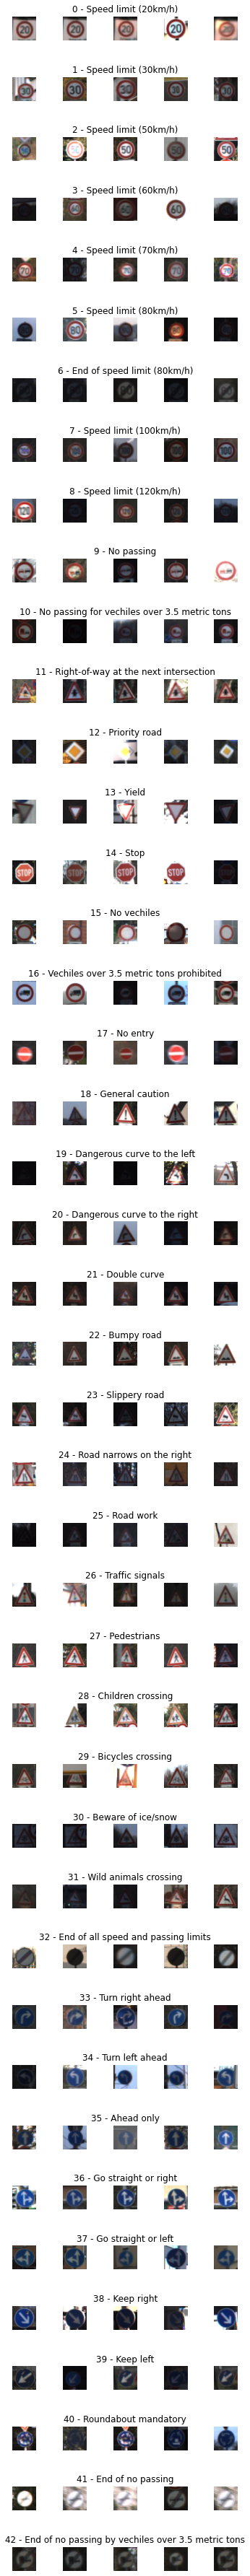

In [2]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

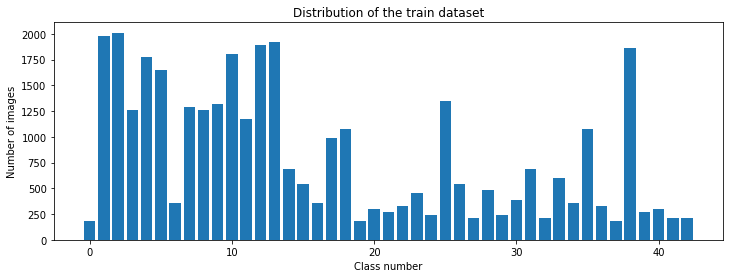

In [3]:
#print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
26


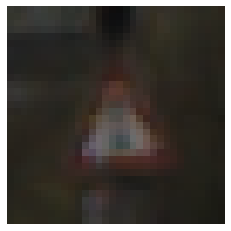

In [4]:
import cv2
 
plt.imshow(X_train[1500])
plt.axis("off")
print(X_train[1500].shape)
print(y_train[1500])
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32, 3)
36


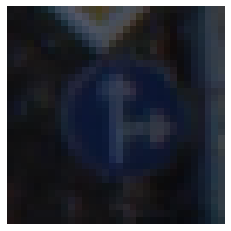

In [5]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])
def grayscale(img):
 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 return img



(32, 32)
(32, 32)
(34799, 32, 32)


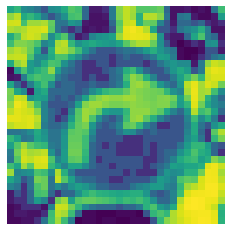

In [6]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)
def equalize(img):
    
    img = cv2.equalizeHist(img)
    return img
    img = equalize(img)

plt.imshow(img)
plt.axis("off")
print(img.shape)

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))
 
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)


(15, 32, 32, 1)


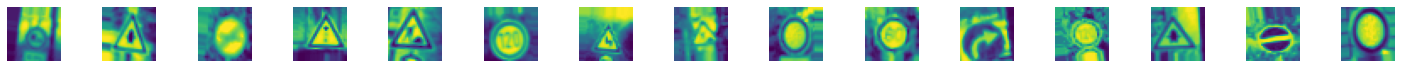

In [8]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)


In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)
# create model
 
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
from keras.models import load_model

In [0]:
new_model=load_model('new_model.h5')

In [12]:
score=new_model.evaluate(X_test,y_test)

12630/12630 [==============================] - 8s 640us/step


In [13]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10439847289084743
Test accuracy: 0.9756135940551758


In [14]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [15]:
data.tail()

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vechiles over 3.5 metric ...


In [0]:
predicted_classes=new_model.predict_classes(X_test)

In [0]:
actual_classes=[]
for i in range(len(y_test)):
  actual_value=np.where(y_test[i]==1.)[0][0]
  actual_classes.append(actual_value)

In [18]:
df=pd.DataFrame(columns=['predicted_classes','actual_classes'])
df['predicted_classes']=predicted_classes
df['actual_classes']=actual_classes
wrong_df=df.loc[df['predicted_classes']!=df['actual_classes']]
wrong_df_index=list(wrong_df.index)
right_df=df.loc[df['predicted_classes']==df['actual_classes']]
right_df_index=list(right_df.index)
print('no. of images correctly predicted : {}'.format(str(len(right_df_index))))
print('no. of images incorrectly predicted : {}'.format(str(len(wrong_df_index))))

no. of images correctly predicted : 12322
no. of images incorrectly predicted : 308


enter a value between 0 and 12321: 8888
predicted_class:Keep right
actual_class:Keep right


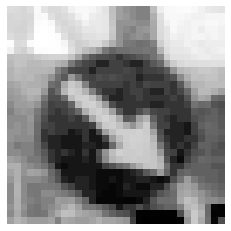

In [21]:
number=input('enter a value between 0 and 12321: ')
number=int(right_df_index[int(number)])
print('predicted_class:{}'.format(data.loc[data['ClassId']==predicted_classes[int(number)]]['SignName'].values[0]))
print('actual_class:{}'.format(data.loc[data['ClassId']==np.where(y_test[int(number)]==1.)[0][0]]['SignName'].values[0]))
plt.imshow(X_test[int(number)].reshape(32,32),cmap='gray')
plt.axis('off')
plt.show()

enter a value between 0 and 307: 5
predicted_class:Dangerous curve to the right
actual_class:Beware of ice/snow


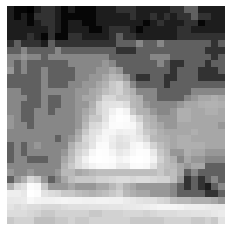

In [20]:
number=input('enter a value between 0 and 307: ')
number=int(wrong_df_index[int(number)])
print('predicted_class:{}'.format(data.loc[data['ClassId']==predicted_classes[int(number)]]['SignName'].values[0]))
print('actual_class:{}'.format(data.loc[data['ClassId']==np.where(y_test[int(number)]==1.)[0][0]]['SignName'].values[0]))
plt.imshow(X_test[int(number)].reshape(32,32),cmap='gray')
plt.axis('off')
plt.show()
